##  Data Load & Structure Check 

In [4]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# --- Style setup (safe fallback) ---
try:
    plt.style.use("seaborn-v0_8-whitegrid")
except Exception:
    sns.set_style("whitegrid")

In [6]:
# --- Load dataset ---
file_path = "../data/processed/enriched.csv"
df = pd.read_csv(file_path)

print(f"✅ Loaded dataset: {df.shape[0]:,} rows × {df.shape[1]} columns")


✅ Loaded dataset: 284,807 rows × 51 columns


In [7]:
# --- Preview ---
display(df.head())


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,avg_amount_7d,account_age_days,token_age_days,avg_spend_user_30d,billing_country,shipping_country,geo_distance_km,amount_zscore,night_txn,weekend_txn
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,149.62,821,163,17.20,BR,PT,7486.8,0.877,True,True
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,76.16,936,147,57.82,IT,IN,6569.0,-0.683,True,True
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,378.66,83,209,7.09,FR,PT,1139.0,2.024,True,True
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,251.08,574,92,56.74,IE,GB,371.7,0.218,True,True
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,69.99,715,330,2.34,AU,ES,15753.6,-0.212,True,True


In [8]:
# --- Structure info ---
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 51 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Time                284807 non-null  float64
 1   V1                  284807 non-null  float64
 2   V2                  284807 non-null  float64
 3   V3                  284807 non-null  float64
 4   V4                  284807 non-null  float64
 5   V5                  284807 non-null  float64
 6   V6                  284807 non-null  float64
 7   V7                  284807 non-null  float64
 8   V8                  284807 non-null  float64
 9   V9                  284807 non-null  float64
 10  V10                 284807 non-null  float64
 11  V11                 284807 non-null  float64
 12  V12                 284807 non-null  float64
 13  V13                 284807 non-null  float64
 14  V14                 284807 non-null  float64
 15  V15                 284807 non-nul

In [9]:
# --- Missing value summary ---
missing = df.isnull().sum()
print("\nMissing values (non-zero only):")
display(missing[missing > 0])


Missing values (non-zero only):


Series([], dtype: int64)

## ️Class Imbalance Analysis

In [10]:

# Count fraud vs non-fraud transactions
class_counts = df["Class"].value_counts()
fraud_ratio = class_counts[1] / class_counts.sum() * 100

In [11]:
print("🔹 Class Distribution:")
print(class_counts)
print(f"\nFraud Ratio: {fraud_ratio:.4f}%")

🔹 Class Distribution:
Class
0    284315
1       492
Name: count, dtype: int64

Fraud Ratio: 0.1727%


/var/folders/hj/bf_kwr31191cgl39dzx0fw2c0000gn/T/ipykernel_54811/1060309003.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette=["#4CAF50", "#E91E63"])


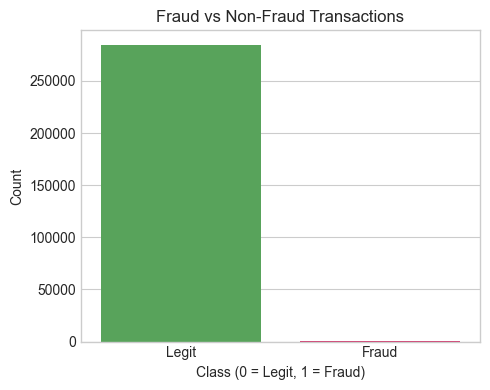

In [12]:
# Visualize the imbalance
plt.figure(figsize=(5,4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette=["#4CAF50", "#E91E63"])
plt.title("Fraud vs Non-Fraud Transactions")
plt.xlabel("Class (0 = Legit, 1 = Fraud)")
plt.ylabel("Count")
plt.xticks([0,1], ["Legit", "Fraud"])
plt.tight_layout()
plt.show()

## Feature Distributions & Correlations

In [13]:
# --- Numeric distributions ---
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

In [14]:
# Exclude label column
numeric_cols = [col for col in numeric_cols if col != 'Class']

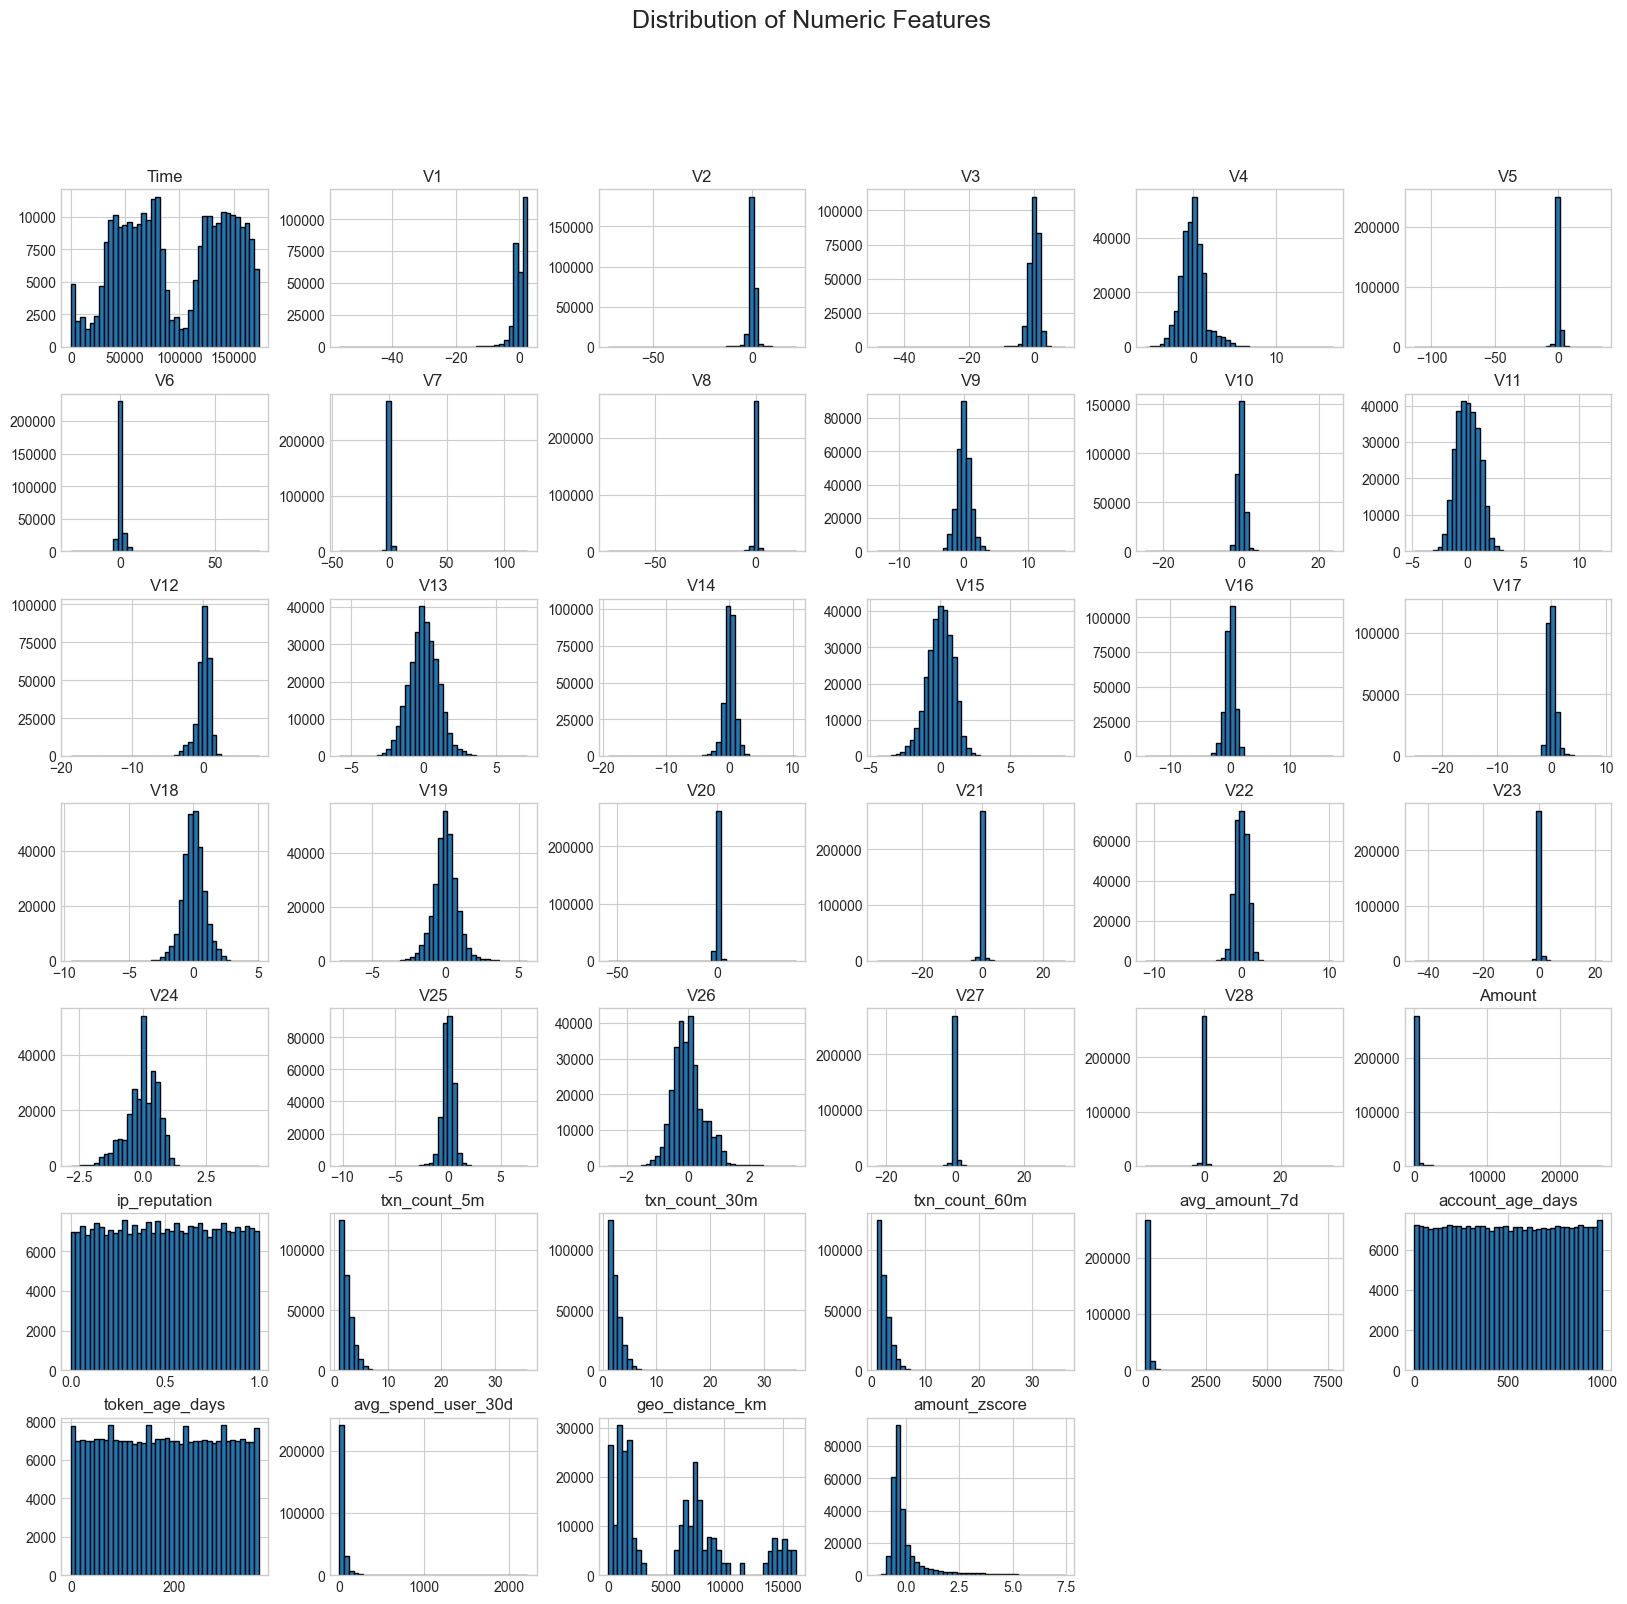

In [15]:
# Plot histograms for a few key numeric features
df[numeric_cols].hist(figsize=(20, 18), bins=40, edgecolor='black')
plt.suptitle("Distribution of Numeric Features", fontsize=18)
plt.show()


In [16]:

# --- Categorical distributions ---
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"\nCategorical columns: {categorical_cols}")


Categorical columns: ['device_id', 'device_os', 'browser', 'ip_country', 'billing_country', 'shipping_country']


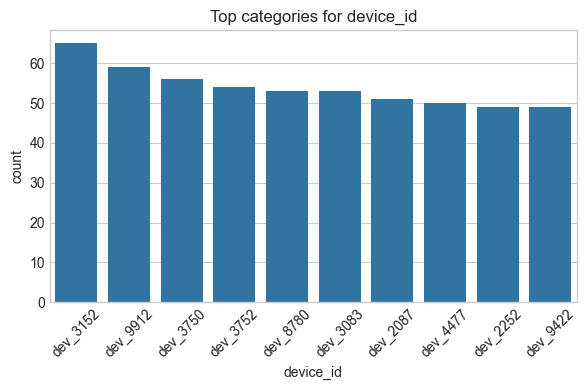

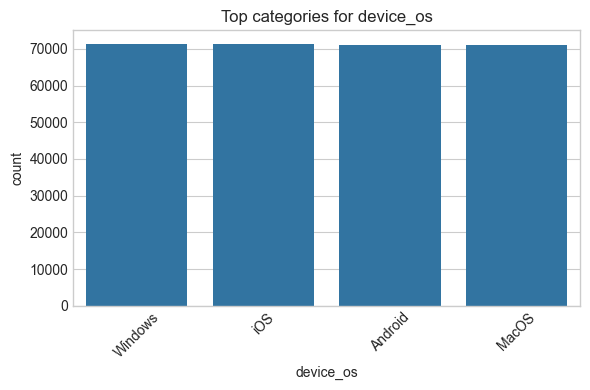

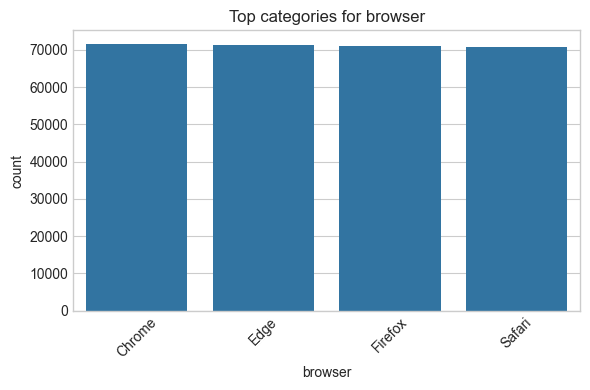

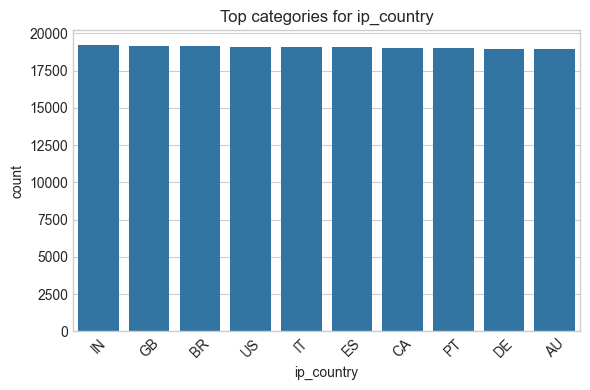

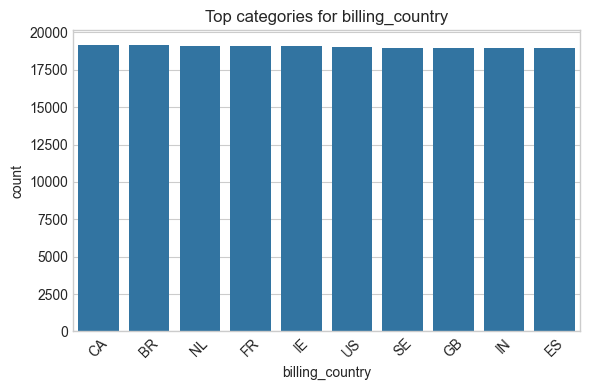

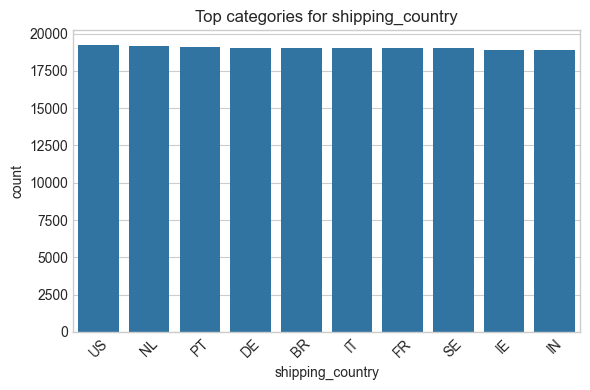

In [17]:
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index[:10])
    plt.title(f"Top categories for {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



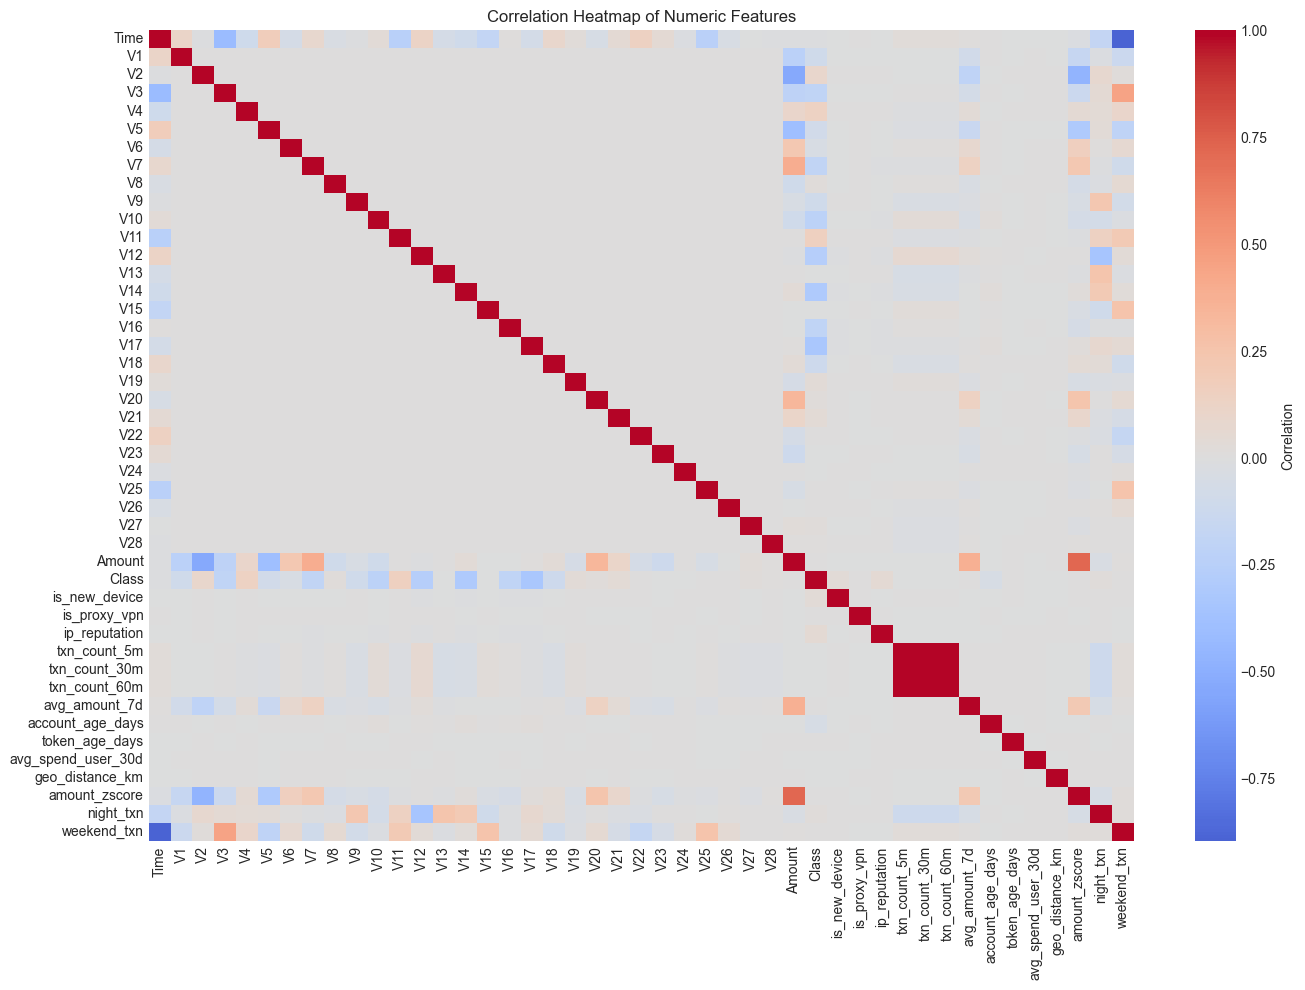

In [18]:
# --- Correlation heatmap ---
plt.figure(figsize=(14,10))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap="coolwarm", center=0, cbar_kws={'label': 'Correlation'})
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()

## Temporal & Velocity Checks

In [19]:

import numpy as np

# --- Convert 'Time' to hours for temporal analysis ---
df['hour'] = (df['Time'] % (24 * 3600)) // 3600  # derive approximate hour of day
df['day'] = (df['Time'] // (24 * 3600)).astype(int)

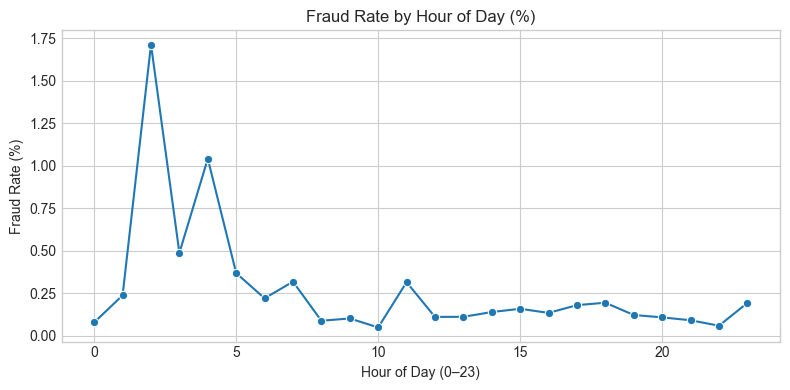

In [20]:
# --- Fraud rate per hour ---
fraud_by_hour = df.groupby('hour')['Class'].mean() * 100
plt.figure(figsize=(8,4))
sns.lineplot(x=fraud_by_hour.index, y=fraud_by_hour.values, marker='o')
plt.title("Fraud Rate by Hour of Day (%)")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Fraud Rate (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

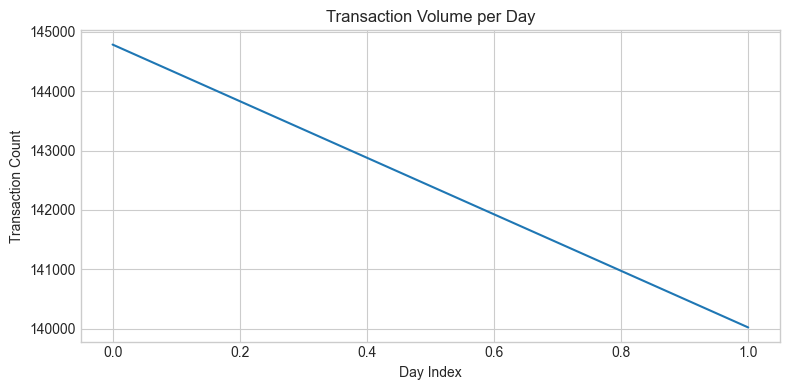

In [21]:
# --- Transaction volume over time ---
plt.figure(figsize=(8,4))
txn_volume = df.groupby('day').size()
sns.lineplot(x=txn_volume.index, y=txn_volume.values)
plt.title("Transaction Volume per Day")
plt.xlabel("Day Index")
plt.ylabel("Transaction Count")
plt.tight_layout()
plt.show()

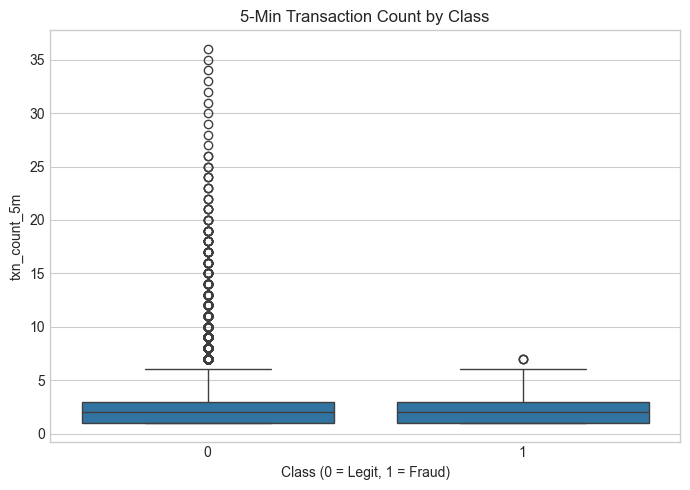

In [22]:
# --- Velocity feature behavior ---
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x="Class", y="txn_count_5m")
plt.title("5-Min Transaction Count by Class")
plt.xlabel("Class (0 = Legit, 1 = Fraud)")
plt.ylabel("txn_count_5m")
plt.tight_layout()
plt.show()

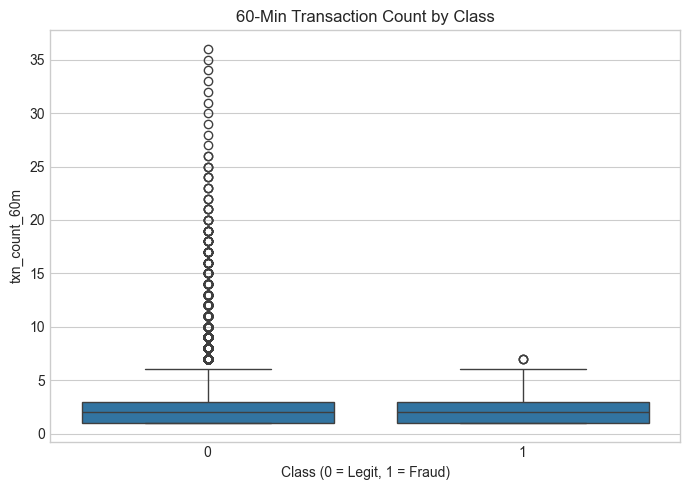

In [23]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x="Class", y="txn_count_60m")
plt.title("60-Min Transaction Count by Class")
plt.xlabel("Class (0 = Legit, 1 = Fraud)")
plt.ylabel("txn_count_60m")
plt.tight_layout()
plt.show()